請就所提供的資料進行以下分析

(1)針對此資料客戶之基本資料進行描述性分析。

(2)分析總交易金額(Total_Trans_Amt)之主要影響因素(請輔以分析表格或視覺化圖形呈現)

分析後請說明分析所得之主要結果。

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

--2022-10-08 16:46:00--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.204.139, 172.217.204.113, 172.217.204.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mfps7jlghar3mjnqa8vmvkr0ld95d546/1665247500000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=10c41e01-900e-42c2-ac21-c8876e1ae58d [following]
--2022-10-08 16:46:01--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mfps7jlghar3mjnqa8vmvkr0ld95d546/1665247500000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=10c41e01-900e-42c2-ac21-c8876e1ae58d
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to d

In [72]:
data=pd.read_csv('BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.000,777,1144,42
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.000,864,1291,33
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.000,0,1887,20
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,3313.000,2517,1171,20
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,4716.000,0,816,28


類別:Attrition_Flag、Gender、Education_Level、Marital_Status、Income_Category、Card_Category

屬量:Customer_Age、Dependent_count、Months_on_book、Total_Relationship_Count、Months_Inactive_12_mon、Credit_Limit、Total_Revolving_Bal、Total_Trans_Amt、Total_Trans_Ct

不重要:CLIENTNUM

#1.針對此資料客戶之基本資料進行描述性分析。

In [73]:
data.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,739177606.334,0.839,46.326,2.346,35.928,3.813,2.341,8631.954,1162.814,4404.086,64.859
std,36903783.450,0.367,8.017,1.299,7.986,1.554,1.011,9088.777,814.987,3397.129,23.473
min,708082083.000,0.000,26.000,0.000,13.000,1.000,0.000,1438.300,0.000,510.000,10.000
25%,713036770.500,1.000,41.000,1.000,31.000,3.000,2.000,2555.000,359.000,2155.500,45.000
50%,717926358.000,1.000,46.000,2.000,36.000,4.000,2.000,4549.000,1276.000,3899.000,67.000
75%,773143533.000,1.000,52.000,3.000,40.000,5.000,3.000,11067.500,1784.000,4741.000,81.000
max,828343083.000,1.000,73.000,5.000,56.000,6.000,6.000,34516.000,2517.000,18484.000,139.000


In [74]:
f=data.groupby('Attrition_Flag')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_帳戶狀況'])
f=data.groupby('Attrition_Flag')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=['Percentage_帳戶狀況'])
a=flist.merge(plist,on = 'Attrition_Flag')
a

,Frequence_帳戶狀況,Percentage_帳戶狀況
Attrition_Flag,,
0,1627,0.161
1,8500,0.839


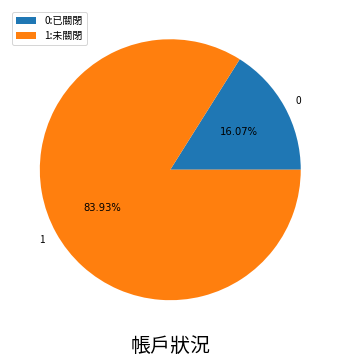

In [75]:
plt.figure(figsize=(6,6))
patches,l_text,p_text = plt.pie(a['Frequence_帳戶狀況'], labels=a.index, autopct="%1.2f%%")
for t in l_text: 
    t.set_fontproperties(myfont)
plt.xlabel("帳戶狀況",fontproperties=myfont,fontsize=20)
plt.legend(labels=['0:已關閉','1:未關閉'],prop=myfont,loc="upper left")
plt.show()

In [76]:
f=data.groupby('Gender')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_性別'])
f=data.groupby('Gender')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=['Percentage_性別'])
a=flist.merge(plist,on = 'Gender')
a

,Frequence_性別,Percentage_性別
Gender,,
F,5358,0.529
M,4769,0.471


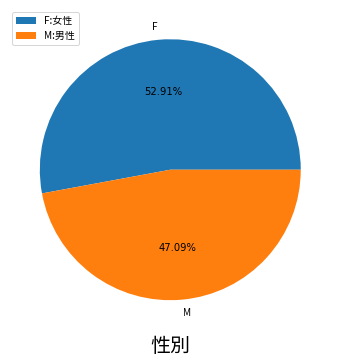

In [77]:
plt.figure(figsize=(6,6))
patches,l_text,p_text = plt.pie(a['Frequence_性別'], labels=a.index, autopct="%1.2f%%")
for t in l_text: 
    t.set_fontproperties(myfont)
plt.xlabel("性別",fontproperties=myfont,fontsize=20)
plt.legend(labels=['F:女性','M:男性'],prop=myfont,loc="upper left")
plt.show()

In [78]:
f=data.groupby('Education_Level')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_教育程度'])
f=data.groupby('Education_Level')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=['Percentage_教育程度'])
a=flist.merge(plist,on = 'Education_Level')
a

,Frequence_教育程度,Percentage_教育程度
Education_Level,,
College,1013,0.100
Doctorate,451,0.045
Graduate,3128,0.309
High School,2013,0.199
Post-Graduate,516,0.051
Uneducated,1487,0.147
Unknown,1519,0.150


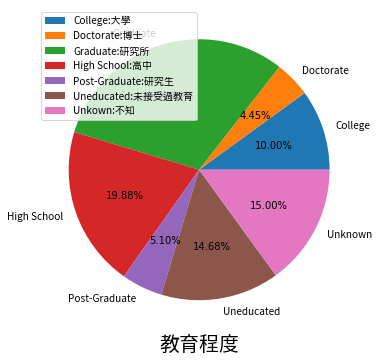

In [79]:
plt.figure(figsize=(6,6))
patches,l_text,p_text = plt.pie(a['Frequence_教育程度'], labels=a.index, autopct="%1.2f%%")
for t in l_text: 
    t.set_fontproperties(myfont)
plt.xlabel("教育程度",fontproperties=myfont,fontsize=20)
plt.legend(labels=['College:大學','Doctorate:博士','Graduate:研究所','High School:高中','Post-Graduate:研究生','Uneducated:未接受過教育','Unkown:不知'],prop=myfont,loc="upper left")
plt.show()

In [80]:
f=data.groupby('Marital_Status')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_婚姻狀況'])
f=data.groupby('Marital_Status')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=['Percentage_婚姻狀況'])
a=flist.merge(plist,on = 'Marital_Status')
a

,Frequence_婚姻狀況,Percentage_婚姻狀況
Marital_Status,,
Divorced,748,0.074
Married,4687,0.463
Single,3943,0.389
Unknown,749,0.074


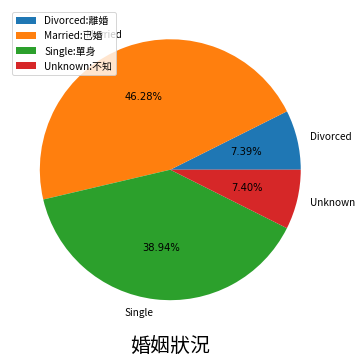

In [81]:
plt.figure(figsize=(6,6))
patches,l_text,p_text = plt.pie(a['Frequence_婚姻狀況'], labels=a.index, autopct="%1.2f%%")
for t in l_text: 
    t.set_fontproperties(myfont)
plt.xlabel("婚姻狀況",fontproperties=myfont,fontsize=20)
plt.legend(labels=['Divorced:離婚','Married:已婚','Single:單身','Unknown:不知'],prop=myfont,loc="upper left")
plt.show()

In [82]:
f=data.groupby('Income_Category')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_所得'])
f=data.groupby('Income_Category')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=['Percentage_所得'])
a=flist.merge(plist,on = 'Income_Category')
a

,Frequence_所得,Percentage_所得
Income_Category,,
$120K +,727,0.072
$40K - $60K,1790,0.177
$60K - $80K,1402,0.138
$80K - $120K,1535,0.152
Less than $40K,3561,0.352
Unknown,1112,0.110


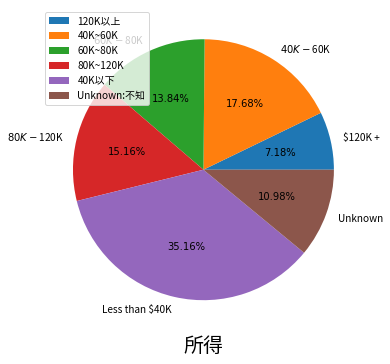

In [83]:
plt.figure(figsize=(6,6))
patches,l_text,p_text = plt.pie(a['Frequence_所得'], labels=a.index, autopct="%1.2f%%")
for t in l_text: 
    t.set_fontproperties(myfont)
plt.xlabel("所得",fontproperties=myfont,fontsize=20)
plt.legend(labels=['120K以上','40K~60K','60K~80K','80K~120K','40K以下','Unknown:不知'],prop=myfont,loc="upper left")
plt.show()

In [84]:
f=data.groupby('Card_Category')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_卡片類別'])
f=data.groupby('Card_Category')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=['Percentage_卡片類別'])
a=flist.merge(plist,on = 'Card_Category')
a

,Frequence_卡片類別,Percentage_卡片類別
Card_Category,,
Blue,9436,0.932
Gold,116,0.011
Platinum,20,0.002
Silver,555,0.055


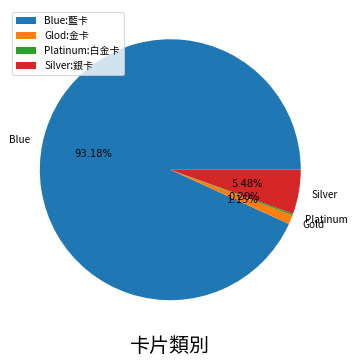

In [85]:
plt.figure(figsize=(6,6))
patches,l_text,p_text = plt.pie(a['Frequence_卡片類別'], labels=a.index, autopct="%1.2f%%")
for t in l_text: 
    t.set_fontproperties(myfont)
plt.xlabel("卡片類別",fontproperties=myfont,fontsize=20)
plt.legend(labels=['Blue:藍卡','Glod:金卡','Platinum:白金卡','Silver:銀卡'],prop=myfont,loc="upper left")
plt.show()

#2.分析總交易金額(Total_Trans_Amt)之主要影響因素(請輔以分析表格或視覺化圖形呈現)

類別:Attrition_Flag、Gender、Education_Level、Marital_Status、Income_Category、Card_Category

屬量:Customer_Age、Dependent_count、Months_on_book、Total_Relationship_Count、Months_Inactive_12_mon、Credit_Limit、Total_Revolving_Bal、Total_Trans_Amt、Total_Trans_Ct

不重要:CLIENTNUM

In [86]:
#1量對多量的相關分析

price_set=['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Credit_Limit','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct']
price_corr=data[price_set].corr()
corr_result=pd.DataFrame(price_corr['Total_Trans_Amt'])

from scipy import stats
name=[]
alist=[]
pvlist=[]
meanlist=[]
for i in range(len(price_set)):
  (r,pvalue)=stats.pearsonr(data['Total_Trans_Amt'],data[price_set[i]]) 
  name.append(price_set[i])
  alist.append(r)
  pvlist.append(pvalue)
pd.set_option('display.float_format',lambda x:'%.3f'%x)
result=pd.DataFrame(alist,name,columns=['Correlation'])
result.insert(1,'p-value',pvlist)
result.insert(2,'平均數',data.describe().T['mean']) 
result=result.sort_values(by=['p-value'])[::-1]
result

,Correlation,p-value,平均數
Dependent_count,0.025,0.012,2.346
Months_Inactive_12_mon,-0.037,0.000,2.341
Months_on_book,-0.039,0.000,35.928
Customer_Age,-0.046,0.000,46.326
Total_Revolving_Bal,0.064,0.000,1162.814
Credit_Limit,0.172,0.000,8631.954
Total_Relationship_Count,-0.347,0.000,3.813
Total_Trans_Ct,0.807,0.000,64.859
Total_Trans_Amt,1.000,0.000,4404.086


In [87]:
#1量對多類(2類)的T檢定

from scipy import stats
(t,p)=stats.ttest_ind(data['Total_Trans_Amt'][data['Attrition_Flag']==0],data['Total_Trans_Amt'][data['Attrition_Flag']==1])
print("Attrition_Flag : t_value=%.3f, p_value=%.3f"%(t,p))
(t,p)=stats.ttest_ind(data['Total_Trans_Amt'][data['Gender']=='F'],data['Total_Trans_Amt'][data['Gender']=='M'])
print("Gender : t_value=%.3f, p_value=%.3f"%(t,p))

Attrition_Flag : t_value=-17.211, p_value=0.000
Gender : t_value=-2.505, p_value=0.012


In [88]:
data.groupby('Attrition_Flag').mean()['Total_Trans_Amt'].to_frame()

,Total_Trans_Amt
Attrition_Flag,
0,3095.026
1,4654.656


In [89]:
data.groupby('Gender').mean()['Total_Trans_Amt'].to_frame()

,Total_Trans_Amt
Gender,
F,4324.318
M,4493.706


In [90]:
#1量對多類(3類以上)的變異數分析

a=['Education_Level','Marital_Status','Income_Category','Card_Category']
F_list =[]
p_list =[]
name_list=[]
for i in a:
  F,p = stats.f_oneway(*[s for idx, s in data.groupby(i).Total_Trans_Amt])
  F_list.append(F)
  p_list.append(p)
  name_list.append(i)
pd.set_option('display.float_format',lambda x:'%.3f'%x)
result1=pd.DataFrame(F_list,name_list,columns=['f-value'])
result1.insert(1,'p-value',p_list)
result1=result1.sort_values(by=['p-value'])[::-1]
result1

,f-value,p-value
Income_Category,0.805,0.546
Education_Level,0.857,0.525
Marital_Status,13.884,0.000
Card_Category,139.079,0.000


In [91]:
data.groupby('Marital_Status').mean()['Total_Trans_Amt'].to_frame()

,Total_Trans_Amt
Marital_Status,
Divorced,4529.091
Married,4173.418
Single,4594.554
Unknown,4720.005


In [92]:
data.groupby('Card_Category').mean()['Total_Trans_Amt'].to_frame()

,Total_Trans_Amt
Card_Category,
Blue,4225.407
Gold,7685.612
Platinum,8999.750
Silver,6590.483
